In [2]:
# imports
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# path to data
round_3_data_path = Path(r"/home/zr/code/trading_project/exploratory_analysis/Prosperity2Data/round-3-island-data-bottle")

In [5]:
# get price data for previous days

days = [0, 1] # not getting data for day 0 because that can be used as a holdout

prices= {}
for day in days:
    
    prices[day]= pd.read_csv(round_3_data_path / Path(f"prices_round_3_day_{day}.csv"), sep=";")


trading_data = pd.concat(prices[day] for day in days).reset_index()
trading_data

,index,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,0,CHOCOLATE,7999,111,NaN,NaN,NaN,NaN,8001,111,NaN,NaN,NaN,NaN,8000.0,0.0
1,1,0,0,STRAWBERRIES,3999,210,NaN,NaN,NaN,NaN,4001,210,NaN,NaN,NaN,NaN,4000.0,0.0
2,2,0,0,ROSES,14999,72,NaN,NaN,NaN,NaN,15001,72,NaN,NaN,NaN,NaN,15000.0,0.0
3,3,0,0,GIFT_BASKET,71348,19,71347.0,24.0,NaN,NaN,71362,19,71363.0,24.0,NaN,NaN,71355.0,0.0
4,4,0,100,GIFT_BASKET,71344,1,71343.0,12.0,71342.0,20.0,71355,1,71356.0,12.0,71357.0,20.0,71349.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,39995,1,999800,STRAWBERRIES,4035,211,NaN,NaN,NaN,NaN,4036,80,4037.0,131.0,NaN,NaN,4035.5,0.0
79996,39996,1,999900,ROSES,14422,70,NaN,NaN,NaN,NaN,14423,70,NaN,NaN,NaN,NaN,14422.5,0.0
79997,39997,1,999900,STRAWBERRIES,4035,204,NaN,NaN,NaN,NaN,4037,204,NaN,NaN,NaN,NaN,4036.0,0.0
79998,39998,1,999900,GIFT_BASKET,70580,15,70579.0,21.0,NaN,NaN,70593,15,70594.0,21.0,NaN,NaN,70586.5,0.0


In [10]:
products = trading_data["product"].unique()

product_data = {}
for product in products:
    product_data[product] = trading_data[trading_data["product"] == product]

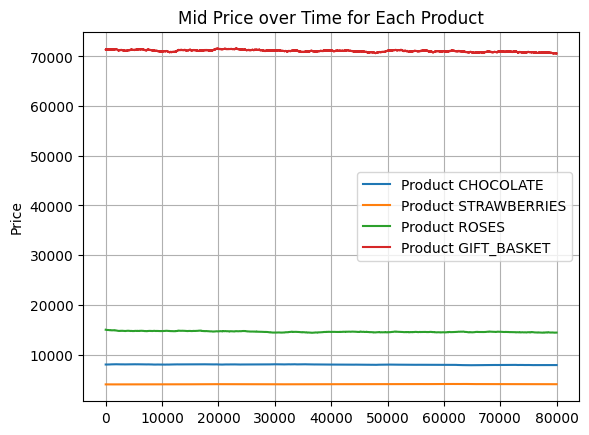

In [12]:
for product in products:
    plt.plot(product_data[product]['mid_price'], label=f'Product {product}')

plt.ylabel('Price')
plt.title('Mid Price over Time for Each Product')
plt.legend()
plt.grid(True)  # Optionally add a grid
plt.show()

In [14]:
def gift_basket_price(chocolate, roses, strawberries):
    return 4 * chocolate + roses + 6 * strawberries

<Axes: xlabel='day,timestamp'>

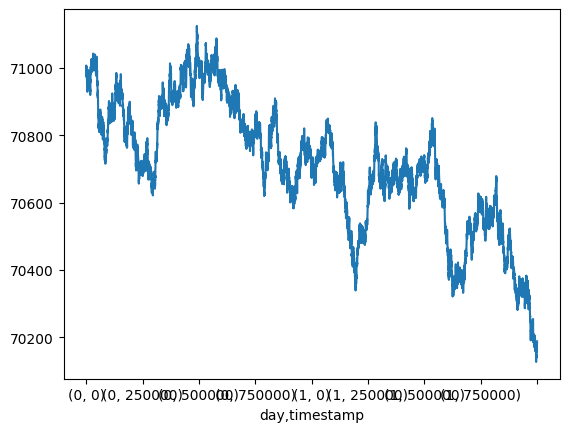

In [63]:
# compare prices of constituents to gift baskets

constituents = ["CHOCOLATE", "ROSES", "STRAWBERRIES"]

constituent_mid_prices = {}
for constituent in constituents:
    constituent_mid_prices[constituent] = product_data[constituent].set_index(["day", "timestamp"])

price_of_constituents_combined = gift_basket_price(constituent_mid_prices["CHOCOLATE"]["mid_price"], constituent_mid_prices["ROSES"]["mid_price"], constituent_mid_prices["STRAWBERRIES"]["mid_price"])
price_of_constituents_combined.plot()


<Axes: >

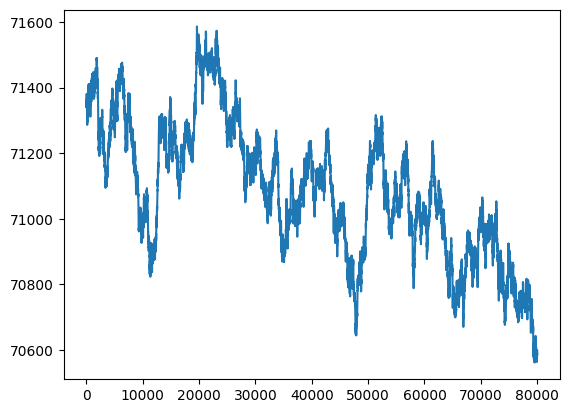

In [43]:
product_data["GIFT_BASKET"]["mid_price"].plot()

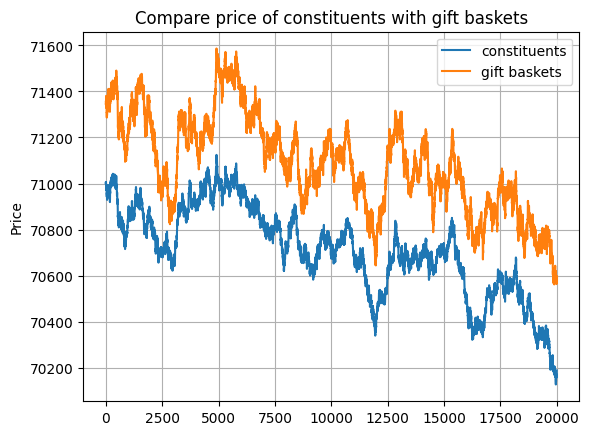

In [64]:
price_of_constituents_combined = price_of_constituents_combined.reset_index()
gift_basket_prices = product_data["GIFT_BASKET"].reset_index()
plt.plot(price_of_constituents_combined["mid_price"], label="constituents")
plt.plot(gift_basket_prices["mid_price"], label="gift baskets")

plt.ylabel('Price')
plt.title('Compare price of constituents with gift baskets')
plt.legend()
plt.grid(True)  # Optionally add a grid
plt.show()

In [77]:
spread = gift_basket_prices["mid_price"] - price_of_constituents_combined["mid_price"] 

spread.describe()

count    20000.000000
mean       376.086200
std         76.374286
min        140.000000
25%        328.000000
50%        380.000000
75%        425.000000
max        632.000000
Name: mid_price, dtype: float64

<Axes: >

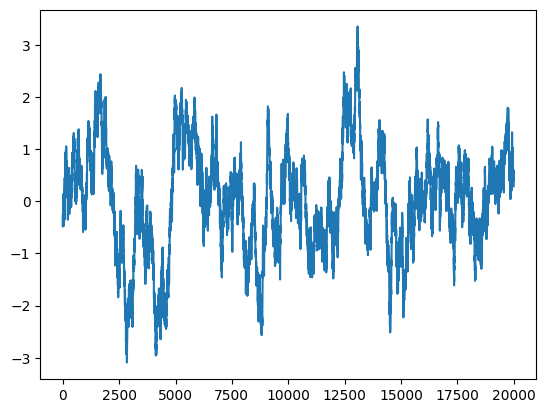

In [80]:
spread_mean = 376.0862
spread_std = 76.374286
spread_z_score = (spread - spread_mean) / spread_std
spread_z_score.plot()

So the idea is that when there is a signficant change in the spread i.e. z-score greater than 2 say, then we can start looking to trade something.

If the z-score > 2 that means that the spread is increasing that means that the price of the gift baskets is overpriced and the price of the underlying are underprices, so sell gift baskets, and buy the underlying

When the z-score returns to 0 then we exit the trade and do the opposite.